In [2]:
import requests
import pandas as pd

In [3]:
url = "https://api.weather.gov/points/40.76,-110.876"
x = requests.get(url)
print(x.text)
data = x.json()

{
    "@context": [
        "https://geojson.org/geojson-ld/geojson-context.jsonld",
        {
            "@version": "1.1",
            "wx": "https://api.weather.gov/ontology#",
            "s": "https://schema.org/",
            "geo": "http://www.opengis.net/ont/geosparql#",
            "unit": "http://codes.wmo.int/common/unit/",
            "@vocab": "https://api.weather.gov/ontology#",
            "geometry": {
                "@id": "s:GeoCoordinates",
                "@type": "geo:wktLiteral"
            },
            "city": "s:addressLocality",
            "state": "s:addressRegion",
            "distance": {
                "@id": "s:Distance",
                "@type": "s:QuantitativeValue"
            },
            "bearing": {
                "@type": "s:QuantitativeValue"
            },
            "value": {
                "@id": "s:value"
            },
            "unitCode": {
                "@id": "s:unitCode",
                "@type": "@id"
            },
    

In [4]:
# FORECAST
forecast_url = data['properties']['forecast']
y = requests.get(forecast_url)
#print(y.text)

forecast = y.json()

forecast_data = forecast['properties']['periods']

df = pd.DataFrame(forecast_data)

print(df)

    number             name                  startTime  \
0        1          Tonight  2023-12-11T20:00:00-07:00   
1        2          Tuesday  2023-12-12T06:00:00-07:00   
2        3    Tuesday Night  2023-12-12T18:00:00-07:00   
3        4        Wednesday  2023-12-13T06:00:00-07:00   
4        5  Wednesday Night  2023-12-13T18:00:00-07:00   
5        6         Thursday  2023-12-14T06:00:00-07:00   
6        7   Thursday Night  2023-12-14T18:00:00-07:00   
7        8           Friday  2023-12-15T06:00:00-07:00   
8        9     Friday Night  2023-12-15T18:00:00-07:00   
9       10         Saturday  2023-12-16T06:00:00-07:00   
10      11   Saturday Night  2023-12-16T18:00:00-07:00   
11      12           Sunday  2023-12-17T06:00:00-07:00   
12      13     Sunday Night  2023-12-17T18:00:00-07:00   
13      14           Monday  2023-12-18T06:00:00-07:00   

                      endTime  isDaytime  temperature temperatureUnit  \
0   2023-12-12T06:00:00-07:00      False           15   

In [23]:
#FORECAST HOURLY
forecast_url = data['properties']['forecastHourly']
z = requests.get(forecast_url)

#print(z.text)

forecast_hr = z.json()
#print(forecast_hr)

forecast_data_hr = forecast_hr['properties']['periods']

df = pd.DataFrame(forecast_data_hr)

print(df)

     number name                  startTime                    endTime  \
0         1       2023-11-20T16:00:00-06:00  2023-11-20T17:00:00-06:00   
1         2       2023-11-20T17:00:00-06:00  2023-11-20T18:00:00-06:00   
2         3       2023-11-20T18:00:00-06:00  2023-11-20T19:00:00-06:00   
3         4       2023-11-20T19:00:00-06:00  2023-11-20T20:00:00-06:00   
4         5       2023-11-20T20:00:00-06:00  2023-11-20T21:00:00-06:00   
..      ...  ...                        ...                        ...   
151     152       2023-11-26T23:00:00-06:00  2023-11-27T00:00:00-06:00   
152     153       2023-11-27T00:00:00-06:00  2023-11-27T01:00:00-06:00   
153     154       2023-11-27T01:00:00-06:00  2023-11-27T02:00:00-06:00   
154     155       2023-11-27T02:00:00-06:00  2023-11-27T03:00:00-06:00   
155     156       2023-11-27T03:00:00-06:00  2023-11-27T04:00:00-06:00   

     isDaytime  temperature temperatureUnit temperatureTrend  \
0         True           43               F    

* think about time zones and adjusting for the user's timezone.
* omit times that have already passed? 
* a big part is going to be making sure the pipeline is clean from the beginning. 

In [24]:
#function layout

#coordinate <- get_coordinate('SLC')

#forecast_df <- get_forecast(coordinate)

# could be get_past 
#history_df <- get_history(coordinate)

# Needs new name.  get_all
#combined_df <- get_h_f(coordinate) #more important



#plots <- weather_plots(df)

#plots['temperature']


#recap function

#recap = weather_recap(df)




In [5]:
#FORECAST GRID DATA
forecast_url = data['properties']['forecastGridData']
g = requests.get(forecast_url)

#print(g.text)

forecast_grid = g.json()
#print(forecast_hr)

forecast_grid_temp = forecast_grid['properties']['temperature']['values']
forecast_grid_dewpoint = forecast_grid['properties']['dewpoint']['values']
forecast_grid_maxTemperature = forecast_grid['properties']['maxTemperature']['values']
forecast_grid_minTemperature = forecast_grid['properties']['minTemperature']['values']
forecast_grid_relativeHumidity = forecast_grid['properties']['relativeHumidity']['values']
#apparentTemp
#wetBulbGlobeTemperature
#heatIndex
#windChill
#skyCover
forecast_grid_windDirection = forecast_grid['properties']['windDirection']['values']
forecast_grid_windSpeed = forecast_grid['properties']['windSpeed']['values']
#windGust
#weather
#probabilityOfPrecipitation
forecast_grid_precip = forecast_grid['properties']['quantitativePrecipitation']['values']
#ice accumulation
forecast_grid_snowfallAmount = forecast_grid['properties']['snowfallAmount']['values']
#snowLevel
#ceilingHeight
#visibility
#transportWindSpeed
#transportWindDirection
#mixingHeight
#hainesIndex
#lightningActivityLevel
#** many empty df**


df_temp = pd.DataFrame(forecast_grid_temp)
df_dewpoint = pd.DataFrame(forecast_grid_dewpoint)
df_maxTemperature = pd.DataFrame(forecast_grid_maxTemperature)
df_minTemperature = pd.DataFrame(forecast_grid_minTemperature)
df_relativeHumidity = pd.DataFrame(forecast_grid_relativeHumidity)
df_windDirection = pd.DataFrame(forecast_grid_windDirection)
df_windSpeed = pd.DataFrame(forecast_grid_windSpeed)
df_precip = pd.DataFrame(forecast_grid_precip)
df_snowfall = pd.DataFrame(forecast_grid_snowfallAmount)

dataframes = [
    df_temp, 
    df_dewpoint, 
    df_maxTemperature, 
    df_minTemperature, 
    df_relativeHumidity, 
    df_windDirection, 
    df_windSpeed, 
    df_precip, 
    df_snowfall
]

In [26]:
#df_dewpoint[['DateTime', 'Duration']] = df_dewpoint['validTime'].str.split('/PT', expand=True)
#df_windSpeed[['DateTime', 'Duration']] = df_windSpeed['validTime'].str.split('/PT', expand=True)

In [27]:
import os

# Directory where the CSV files will be saved
output_directory = 'forecast_csv'

dataframes_dict = {
    'df_temp': df_temp,
    'df_dewpoint': df_dewpoint,
    'df_maxTemperature': df_maxTemperature,
    'df_minTemperature': df_minTemperature,
    'df_relativeHumidity': df_relativeHumidity,
    'df_windDirection': df_windDirection,
    'df_windSpeed': df_windSpeed,
    'df_precip': df_precip,
    'df_snowfall': df_snowfall
}
for name, df in dataframes_dict.items():
    csv_filename = os.path.join(output_directory, f'{name}.csv')
    df.to_csv(csv_filename, index=False)

In [7]:
dataframes_dict = {
    'df_temp': df_temp,
    'df_dewpoint': df_dewpoint,
    'df_maxTemperature': df_maxTemperature,
    'df_minTemperature': df_minTemperature,
    'df_relativeHumidity': df_relativeHumidity,
    'df_windDirection': df_windDirection,
    'df_windSpeed': df_windSpeed,
    'df_precip': df_precip,
    'df_snowfall': df_snowfall
}

# Initialize a list to hold the dataframes
dfs = []

# Add each dataframe to the list
for name, df in dataframes_dict.items():
    # Assuming each DataFrame has a 'validTime' column and other unique columns
    df = df.rename(columns={col: f"{name}_{col}" for col in df.columns if col != 'validTime'})
    dfs.append(df)

# Merge all dataframes on 'validTime' column
combined_df = pd.concat(dfs, axis=1)
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

# Now you can save the combined dataframe
combined_df.to_csv('combined_dataframe.csv', index=False)

In [28]:
for df in dataframes:
    df[['DateTime', 'Duration']] = df['validTime'].str.split('/PT', expand=True)
    df['Duration'] = 'PT' + df['Duration']  

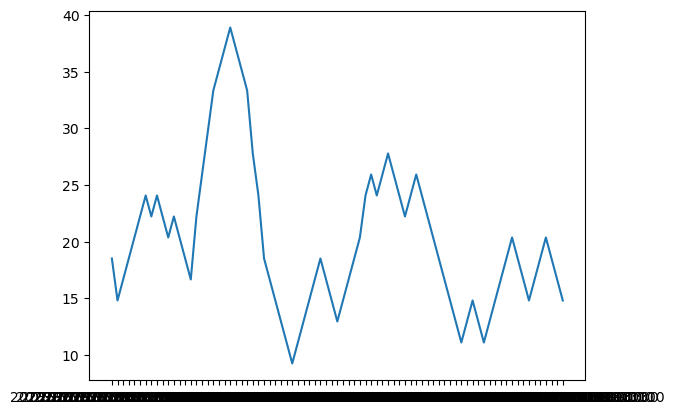

In [29]:
import matplotlib.pyplot as plt
#plt.plot(df_dewpoint['DateTime'],df_dewpoint['value'])
plt.plot(df_windSpeed['DateTime'],df_windSpeed['value'])